# Calculating aggregate variables

Here we can calculate aggregate variables for different models and add them to the database.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path

import matplotlib.pyplot as plt
import pyrcmip.database
import scmdata
import tqdm.autonotebook as tqdman

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
output_database = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
output_database

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [4]:
OUTPUT_DATABASE_DIR_HADCRUT5 = os.path.join(
    "..", "..", "data", "processed", "submission-database-hadcrut5-target"
)
output_database_hadcrut5 = pyrcmip.database.Database(OUTPUT_DATABASE_DIR_HADCRUT5)
output_database_hadcrut5

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>

<IPython.core.display.Javascript object>

In [5]:
def save_to_database(inp, db):
    group_columns = ["climate_model", "variable", "region", "scenario"]
    total_files = inp.meta[group_columns].drop_duplicates().shape[0]
    for r in tqdman.tqdm(inp.groupby(group_columns), total=total_files, leave=False):
        r_no_nans = scmdata.ScmRun(r.timeseries(drop_all_nan_times=True))
        db.save_condensed_file(r_no_nans)

<IPython.core.display.Javascript object>

In [6]:
def sum_components(inp, out_name, expected_components):
    tmp = inp.timeseries()

    assert set(tmp.index.get_level_values("variable")) == expected_components

    grouper_cols = list(set(tmp.index.names) - {"variable"})
    tmp_total = tmp.groupby(grouper_cols).sum()
    tmp_total["variable"] = out_name
    tmp_total = scmdata.ScmRun(tmp_total)

    return tmp_total

<IPython.core.display.Javascript object>

In [7]:
def find_model_scenarios(search_glob, db):
    return set(
        [
            v.split(os.path.sep)[-2]
            for v in glob.glob(
                os.path.join(
                    db._root_dir,
                    "**",
                    search_glob,
                ),
                recursive=True,
            )
        ]
    )

<IPython.core.display.Javascript object>

# Cumulative emissions CO$_2$

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 14303, timepoints: 651)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	      climate_model  ensemble_member           model region scenario    unit  \
	0          MCE-v1-2              0.0  not_applicable  World  1pctCO2  Mt CO2   
	1          MCE-v1-2              1.0  not_applicable  World  1pctCO2  Mt CO2   
	2          MCE-v1-2              2.0  not_applicable  World  1pctCO2  Mt CO2   
	3          MCE-v1-2              3.0  not_applicable  World  1pctCO2  Mt CO2   
	4          MCE-v1-2              4.0  not_applicable  World  1pctCO2  Mt CO2   
	...             ...              ...             ...    ...      ...     ...   
	14298       FaIR1.6            496.0     unspecified  World  1pctCO2  Mt CO2   
	14299       FaIR1.6            497.0     unspecified  World  1pctCO2  Mt CO2   
	14300       FaIR1.6            498.0     unspecified  World  1pctCO2  Mt CO2   
	14301       FaIR1.6            499.0     unspecified  World  1pctCO2 

"['MCE-v1-2', 'FaIRv2.0.0-alpha', 'OSCARv3.1', 'FaIR1.6'] already provide cumulative emissions CO2"

"Calculating cumulative emissions CO2 for ['MAGICCv7.5.1']"

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/ops.py:579: UserWarning: You are integrating data which contains nans so your result will also contain nans. Perhaps you want to remove the nans before performing the integration using a combination of :meth:`filter` and :meth:`interpolate`?
  "You are integrating data which contains nans so your result will "


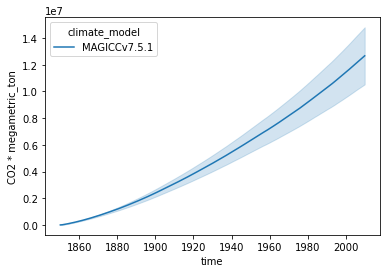

0it [00:00, ?it/s]

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 11200, timepoints: 251)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	          climate_model  ensemble_member        model region scenario  \
	0      FaIRv2.0.0-alpha              321    idealised  World  1pctCO2   
	1      FaIRv2.0.0-alpha              400    idealised  World  1pctCO2   
	2      FaIRv2.0.0-alpha              687    idealised  World  1pctCO2   
	3      FaIRv2.0.0-alpha              818    idealised  World  1pctCO2   
	4      FaIRv2.0.0-alpha              973    idealised  World  1pctCO2   
	...                 ...              ...          ...    ...      ...   
	11195      MAGICCv7.5.1              595  unspecified  World  1pctCO2   
	11196      MAGICCv7.5.1              596  unspecified  World  1pctCO2   
	11197      MAGICCv7.5.1              597  unspecified  World  1pctCO2   
	11198      MAGICCv7.5.1              598  unspecified  World  1pctCO2   
	11199      MAGICCv7.5.1              599  unspecified  World  1pc

"['FaIRv2.0.0-alpha', 'MAGICCv7.5.1'] already provide cumulative emissions CO2"

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

All models already provide cumulative emissions CO2


<IPython.core.display.Javascript object>

In [8]:
for db in [output_database, output_database_hadcrut5]:
    start = db.load_data(
        climate_model="*",
        scenario="1pctCO2",
        variable="*Emissions|CO2*",
        region="World",
    )
    display(start)

    cumulative_models = start.filter(variable="Cumulative Emissions*").get_unique_meta(
        "climate_model"
    )
    display("{} already provide cumulative emissions CO2".format(cumulative_models))

    derived = start.filter(climate_model=cumulative_models, keep=False).filter(
        variable="*Fossil*", keep=False
    )
    if derived.empty:
        print("All models already provide cumulative emissions CO2")
        continue

    assert derived.get_unique_meta("variable", True) == "Emissions|CO2"
    display(
        "Calculating cumulative emissions CO2 for {}".format(
            derived.get_unique_meta("climate_model")
        )
    )

    cumulative_co2 = derived.integrate()
    cumulative_co2.filter(year=range(1850, 2011)).lineplot(hue="climate_model")
    plt.show()

    for cumulative_cm in tqdman.tqdm(cumulative_co2.groupby("climate_model")):
        db.save_condensed_file(cumulative_cm)

## SCM4OPT

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 16000, timepoints: 651)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	      climate_model  ensemble_member        model region scenario   unit  \
	0       SCM4OPTv2.1                1  unspecified  World   ssp370  ZJ/yr   
	1       SCM4OPTv2.1                2  unspecified  World   ssp370  ZJ/yr   
	2       SCM4OPTv2.1                3  unspecified  World   ssp370  ZJ/yr   
	3       SCM4OPTv2.1                4  unspecified  World   ssp370  ZJ/yr   
	4       SCM4OPTv2.1                5  unspecified  World   ssp370  ZJ/yr   
	...             ...              ...          ...    ...      ...    ...   
	15995   SCM4OPTv2.1             1996  unspecified  World   ssp245  ZJ/yr   
	15996   SCM4OPTv2.1             1997  unspecified  World   ssp245  ZJ/yr   
	15997   SCM4OPTv2.1             1998  unspecified  World   ssp245  ZJ/yr   
	15998   SCM4OPTv2.1             1999  unspecified  World   ssp245  ZJ/yr   
	15999   SCM4OPTv2.1             

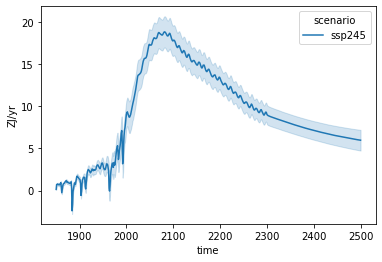

time                                                                                     1850-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit       variable                                  
SCM4OPTv2.1   1               unspecified World  ssp370   zettajoule Heat Content|Ocean                  0.0   
              2               unspecified World  ssp370   zettajoule Heat Content|Ocean                  0.0   
              3               unspecified World  ssp370   zettajoule Heat Content|Ocean                  0.0   
              4               unspecified World  ssp370   zettajoule Heat Content|Ocean                  0.0   
              5               unspecified World  ssp370   zettajoule Heat Content|Ocean                  0.0   

time                                                                                     1851-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit       variable                                  
SCM4OPTv2.1   1               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.610278   
              2               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.364686   
              3               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.366745   
              4               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.322065   
              5               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.373412   

time                                                                                     1852-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit       variable                                  
SCM4OPTv2.1   1               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.635966   
              2               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.978323   
              3               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.985686   
              4               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.844446   
              5               unspecified World  ssp370   zettajoule Heat Content|Ocean             0.998252   

time                                                                                     1853-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit       variable                                  
SCM4OPTv2.1   1               unspecified World  ssp370   zettajoule Heat Content|Ocean             2.723413   
              2               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.618941   
              3               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.619593   
              4               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.358690   
              5               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.646339   

time                                                                                     1854-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit       variable                                  
SCM4OPTv2.1   1               unspecified World  ssp370   zettajoule Heat Content|Ocean             3.829708   
              2               unspecified World  ssp370   zettajoule Heat Content|Ocean             2.257753   
              3               unspecified World  ssp370   zettajoule Heat Content|Ocean             2.236757   
              4               unspecified World  ssp370   zettajoule Heat Content|Ocean             1.856652   
              5               unspecified World  ssp370   zettajoule Heat Content|Ocean             2.293105   

time                                                                       

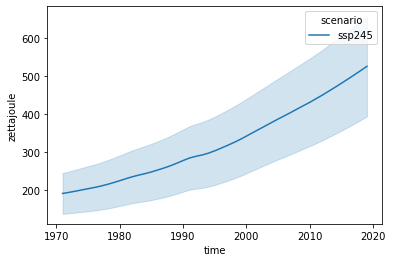

  0%|          | 0/8 [00:00<?, ?it/s]

Loading files: 0it [00:00, ?it/s]

No data for database: <utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>


<IPython.core.display.Javascript object>

In [9]:
for db in [output_database, output_database_hadcrut5]:
    try:
        scm4opt_ohu = db.load_data(
            climate_model="SCM4OPT*",
            scenario="ssp*",
            variable="Heat Uptake|Ocean",
            region="World",
        )
    except ValueError:
        print("No data for database: {}".format(db))
        continue

    display(scm4opt_ohu)
    scm4opt_ohu.filter(scenario="ssp245").lineplot()
    plt.show()

    scm4opt_ohc = scm4opt_ohu.integrate(out_var="Heat Content|Ocean")
    display(scm4opt_ohc.head())

    scm4opt_ohc.filter(year=range(1971, 2020), scenario="ssp245").lineplot()
    plt.show()

    save_to_database(scm4opt_ohc, db)

## FaIR1.6

We convert from total earth system heat uptake to ocean heat uptake using a factor of 0.92, as discussed via email with Chris Smith.

In [10]:
for db in [output_database, output_database_hadcrut5]:
    try:
        fair16_hu = db.load_data(
            climate_model="FaIR1.6*",
            scenario="ssp*",
            variable="Heat Uptake",
            region="World",
        )
    except ValueError:
        print("No data for database: {}".format(db))
        continue

    display(fair16_hu)

    fair16_ohc = (fair16_hu * 0.92).integrate(out_var="Heat Content|Ocean")
    display(fair16_ohc)

    save_to_database(fair16_ohc, db)

Loading files:   0%|          | 0/14 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 7014, timepoints: 651)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	     climate_model  ensemble_member        model region  \
	0          FaIR1.6                0  unspecified  World   
	1          FaIR1.6                1  unspecified  World   
	2          FaIR1.6                2  unspecified  World   
	3          FaIR1.6                3  unspecified  World   
	4          FaIR1.6                4  unspecified  World   
	...            ...              ...          ...    ...   
	7009       FaIR1.6              496  unspecified  World   
	7010       FaIR1.6              497  unspecified  World   
	7011       FaIR1.6              498  unspecified  World   
	7012       FaIR1.6              499  unspecified  World   
	7013       FaIR1.6              500  unspecified  World   
	
	                       scenario   unit     variable  
	0     ssp370-lowNTCF-aerchemmip  ZJ/yr  Heat Uptake  
	1     ssp370-lowNTCF-aerchemmip  ZJ/yr  Heat Upt

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/ops.py:579: UserWarning: You are integrating data which contains nans so your result will also contain nans. Perhaps you want to remove the nans before performing the integration using a combination of :meth:`filter` and :meth:`interpolate`?
  "You are integrating data which contains nans so your result will "


<scmdata.ScmRun (timeseries: 7014, timepoints: 651)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	     climate_model  ensemble_member        model region  \
	0          FaIR1.6                0  unspecified  World   
	1          FaIR1.6                1  unspecified  World   
	2          FaIR1.6                2  unspecified  World   
	3          FaIR1.6                3  unspecified  World   
	4          FaIR1.6                4  unspecified  World   
	...            ...              ...          ...    ...   
	7009       FaIR1.6              496  unspecified  World   
	7010       FaIR1.6              497  unspecified  World   
	7011       FaIR1.6              498  unspecified  World   
	7012       FaIR1.6              499  unspecified  World   
	7013       FaIR1.6              500  unspecified  World   
	
	                       scenario        unit            variable  
	0     ssp370-lowNTCF-aerchemmip  zettajoule  Heat Content|Ocean  
	1     ssp370-lowNTCF-aer

  0%|          | 0/14 [00:00<?, ?it/s]

Loading files: 0it [00:00, ?it/s]

No data for database: <utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>


<IPython.core.display.Javascript object>

## Cicero

Cicero-SCM only has ocean heat uptake (i.e. ocean heat uptake is same as global heat uptake).

In [11]:
for db in [output_database, output_database_hadcrut5]:
    cicero_heat_uptake_scenarios = find_model_scenarios("Cicero*Heat-Uptake*.nc", db)
    if not cicero_heat_uptake_scenarios:
        print("No data for database: {}".format(db))
        continue

    display(cicero_heat_uptake_scenarios)

    for scen in tqdman.tqdm(cicero_heat_uptake_scenarios):
        cicero_heat_uptake_total = db.load_data(
            "Cicero*", "Heat Uptake|Ocean", "World", scen
        )
        cicero_heat_uptake_total["variable"] = "Heat Uptake"

        db.save_condensed_file(cicero_heat_uptake_total)

{'1pctCO2',
 'abrupt-0p5xCO2',
 'abrupt-2xCO2',
 'abrupt-4xCO2',
 'esm-rcp26',
 'esm-rcp26-allGHG',
 'esm-rcp45',
 'esm-rcp45-allGHG',
 'esm-rcp60',
 'esm-rcp60-allGHG',
 'esm-rcp85',
 'esm-rcp85-allGHG',
 'esm-ssp119',
 'esm-ssp119-allGHG',
 'esm-ssp126',
 'esm-ssp126-allGHG',
 'esm-ssp245',
 'esm-ssp245-allGHG',
 'esm-ssp370',
 'esm-ssp370-allGHG',
 'esm-ssp370-lowNTCF-aerchemmip',
 'esm-ssp370-lowNTCF-aerchemmip-allGHG',
 'esm-ssp370-lowNTCF-gidden',
 'esm-ssp370-lowNTCF-gidden-allGHG',
 'esm-ssp434',
 'esm-ssp434-allGHG',
 'esm-ssp460',
 'esm-ssp460-allGHG',
 'esm-ssp534-over',
 'esm-ssp534-over-allGHG',
 'esm-ssp585',
 'esm-ssp585-allGHG',
 'historical',
 'rcp26',
 'rcp45',
 'rcp60',
 'rcp85',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF-aerchemmip',
 'ssp370-lowNTCF-gidden',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585'}

  0%|          | 0/47 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


No data for database: <utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>


<IPython.core.display.Javascript object>

### Aerosols ERF

In [12]:
cicero_aerosol_components = {
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Sulfate",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|BC and OC|BC",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|BC and OC|OC",
}

<IPython.core.display.Javascript object>

In [13]:
for db in [output_database, output_database_hadcrut5]:
    cicero_aerosol_scenarios = find_model_scenarios(
        "Cicero*Effective-Radiative-Forcing*Aerosols*.nc", db
    )
    if not cicero_aerosol_scenarios:
        print("No data for database: {}".format(db))
        continue

    for scen in tqdman.tqdm(cicero_aerosol_scenarios):
        cicero_aerosols = db.load_data("Cicero*", "*Aerosols|*", "World", scen)
        cicero_aerosols_total = sum_components(
            cicero_aerosols,
            "Effective Radiative Forcing|Anthropogenic|Aerosols",
            cicero_aerosol_components,
        )

        display(cicero_aerosols_total.head())

        db.save_condensed_file(cicero_aerosols_total)

  0%|          | 0/47 [00:00<?, ?it/s]

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp245-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  rcp85    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                                     1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                      unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                                     1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                      unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                                     1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                      unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                                     1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                      unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                                            1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                             unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                                            1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                             unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                                            1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                             unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                                            1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                             unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-aerchemmip-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp85-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520          

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  rcp45    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                    1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-4xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp585 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                      1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario       unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                      1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario       unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                      1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario       unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                      1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario       unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-0p5xCO2 W/m^2 Effective Ra

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp45-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520          

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp585-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp370-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiat

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                                        1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                                        1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                                        1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                                        1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp370-lowNTCF-gidden-allGHG W/m

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  rcp26    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp119 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                             1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario              unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                             1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario              unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                             1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario              unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                             1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario              unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified Wor

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp460-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  esm-rcp60 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                        

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp119-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp434 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  esm-rcp26 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                        

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp370 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp434-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  esm-rcp45 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                        

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                       1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario        unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                       1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario        unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                       1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario        unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                       1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario        unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ss

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  1pctCO2  W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp460 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp245 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp26-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520          

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario                  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp370-lowNTCF-gidden W/m^2 Effective Radiat

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                         1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                         1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                         1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                         1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario          unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp126-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                 1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                 1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                 1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                 1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario  unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  esm-rcp85 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                        

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                   1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario    unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                   1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario    unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                   1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario    unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                   1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario    unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520            unspecified World  rcp60    W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000497   

time                                                                                                    

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000245   
              910             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000268   
              1200            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001596   
              1500            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000943   
              1520            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000506   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000244   
              910             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000266   
              1200            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001587   
              1500            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000937   
              1520            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000503   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000242   
              910             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000265   
              1200            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001578   
              1500            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000932   
              1520            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000500   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario         unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000241   
              910             unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000263   
              1200            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001569   
              1500            unspecified World  esm-rcp60-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000927   
              1520          

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                  1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                  1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                  1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                  1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario   unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  esm-ssp126 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                            

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                    1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                    1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario     unit  variable                                                                  
Cicero-SCM    340             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              910             unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1200            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1500            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
              1520            unspecified World  abrupt-2xCO2 W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                              1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario               unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                              1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario               unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                              1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario               unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                              1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario               unit  variable                                                                  
Cicero-SCM    340             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  esm-ssp534-over-allGHG W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500 

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                1750-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003978   
              910             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004160   
              1200            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.025069   
              1500            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014857   
              1520            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007902   

time                                                                                                                1751-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003935   
              910             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024796   
              1500            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014696   
              1520            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007816   

time                                                                                                                1752-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003917   
              910             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004096   
              1200            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024683   
              1500            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014629   
              1520            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007780   

time                                                                                                                1753-01-01 00:00:00  \
climate_model ensemble_member model       region scenario unit  variable                                                                  
Cicero-SCM    340             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.003936   
              910             unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004115   
              1200            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.024798   
              1500            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.014697   
              1520            unspecified World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.007817   

time                                                                                                    

No data for database: <utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>


<IPython.core.display.Javascript object>

## FaIRv2.0.0

## Aerosols ERF

In [14]:
fair_aerosol_components = {
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions",
    "Effective Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions",
}

<IPython.core.display.Javascript object>

In [15]:
for db in [output_database, output_database_hadcrut5]:
    fair_aerosol_scenarios = find_model_scenarios(
        "FaIRv2.0.0*Effective-Radiative-Forcing*Aerosols*.nc", db
    )
    if not fair_aerosol_scenarios:
        print("No data for database: {}".format(db))
        continue

    for scen in tqdman.tqdm(fair_aerosol_scenarios):
        fair_aerosols = db.load_data("FaIRv2.0.0*", "*Aerosols|*", "World", scen)
        fair_aerosols_total = sum_components(
            fair_aerosols,
            "Effective Radiative Forcing|Anthropogenic|Aerosols",
            fair_aerosol_components,
        )
        display(fair_aerosols_total.head())
        db.save_condensed_file(fair_aerosols_total)

  0%|          | 0/11 [00:00<?, ?it/s]

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

time                                                                                                                         1750-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 519             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 649             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 732             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 1241            MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   

time                                                                                                                         1751-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.002732   
                 519             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.005450   
                 649             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.005159   
                 732             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.003610   
                 1241            MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.001758   

time                                                                                                                         1752-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.004689   
                 519             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.008916   
                 649             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.008693   
                 732             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.006128   
                 1241            MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.002483   

time                                                                                                                         1753-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.002803   
                 519             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.005543   
                 649             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.005231   
                 732             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.003639   
                 1241            MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.001786   

time                                                                                                    

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                          1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                          1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                                          1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                                          1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosol

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001786   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                       1750-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                       1751-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                                       1752-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                                       1753-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            MESSAGE-GLOBIOM World 

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                     1750-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                     1751-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                                     1752-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                                     1753-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogeni

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001786   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001786   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                              1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                              1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                                              1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                                              1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 73

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001786   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 124             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241            AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001786   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 519             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 649             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 732             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 1241            REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002732   
                 519             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005450   
                 649             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005159   
                 732             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003610   
                 1241            REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.001758   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.004689   
                 519             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008916   
                 649             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.008693   
                 732             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006128   
                 1241            REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.002483   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 124             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.002803   
                 519             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005543   
                 649             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.005231   
                 732             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003639   
                 1241       

  0%|          | 0/11 [00:00<?, ?it/s]

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

time                                                                                                                         1750-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 400             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 687             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 818             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   
                 973             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols         0.0   

time                                                                                                                         1751-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.004694   
                 400             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.003900   
                 687             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.001096   
                 818             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.000277   
                 973             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.004055   

time                                                                                                                         1752-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.007854   
                 400             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.006102   
                 687             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.001899   
                 818             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.000652   
                 973             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.006610   

time                                                                                                                         1753-01-01  \
climate_model    ensemble_member model           region scenario   unit  variable                                                         
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.004736   
                 400             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.003954   
                 687             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols   -0.001141   
                 818             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.000310   
                 973             MESSAGE-GLOBIOM World  historical W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols    0.004117   

time                                                                                                    

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                          1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                          1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                                          1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                                          1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario              unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             AIM   World  ssp370-lowNTCF-gidden W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosol

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             IMAGE World  ssp119   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004117   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                       1750-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                       1751-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                                       1752-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                                       1753-01-01 00:00:00  \
climate_model    ensemble_member model           region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             MESSAGE-GLOBIOM World  ssp245   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             MESSAGE-GLOBIOM World 

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                     1750-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                     1751-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                                     1752-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                                     1753-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             REMIND-MAGPIE World  ssp585   W/m^2 Effective Radiative Forcing|Anthropogeni

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             GCAM4 World  ssp460   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004117   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             IMAGE World  ssp126   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004117   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                              1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                              1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                                              1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                                              1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario                  unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             AIM   World  ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 81

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             GCAM4 World  ssp434   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004117   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                             1750-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                             1751-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                             1752-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                             1753-01-01 00:00:00  \
climate_model    ensemble_member model region scenario unit  variable                                                                  
FaIRv2.0.0-alpha 321             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973             AIM   World  ssp370   W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004117   

time                                                                                                             1754-01-01 00:00:00  \
climate_model    ensemble_member model region scenar

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


time                                                                                                                        1750-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 400             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 687             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 818             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   
                 973             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols                  0.0   

time                                                                                                                        1751-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004694   
                 400             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003900   
                 687             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001096   
                 818             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000277   
                 973             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004055   

time                                                                                                                        1752-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.007854   
                 400             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006102   
                 687             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001899   
                 818             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.000652   
                 973             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.006610   

time                                                                                                                        1753-01-01 00:00:00  \
climate_model    ensemble_member model         region scenario    unit  variable                                                                  
FaIRv2.0.0-alpha 321             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.004736   
                 400             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.003954   
                 687             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols            -0.001141   
                 818             REMIND-MAGPIE World  ssp534-over W/m^2 Effective Radiative Forcing|Anthropogenic|Aerosols             0.000310   
                 973        

<IPython.core.display.Javascript object>